<a href="https://colab.research.google.com/github/victorknox/RedditAnalysis/blob/main/Reddit_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the data

In [ ]:
import pandas as pd
data = pd.read_csv('Reddit_comments.csv', names=['title', 'body', 'votes', 'subreddit name', 'time', 'date', 'author'])
print(data.head())

FileNotFoundError: ignored

# using text2emotion to extract sentiments

In [ ]:
pip install text2emotion

In [ ]:
comments = data['body']

In [ ]:
import text2emotion as te

emotions = []
for comment in comments:
  emotion = te.get_emotion(str(comment))
  emotions.append(emotion)

In [ ]:
print(len(emotions))

86325


In [ ]:
# Writing to a CSV file
import csv
from csv import DictWriter
  
# list of column names 
field_names = ['Happy','Angry', 'Surprise','Sad', 'Fear']
  

with open('emotions.csv', 'w') as f_object:
    dictwriter_object = DictWriter(f_object, fieldnames=field_names)
    writer = csv.writer(f_object)
    writer.writerow(field_names)
    for dict in emotions:
      dictwriter_object.writerow(dict)
  
    #Close the file object
    f_object.close()

In [ ]:
posts = data['title'].unique()

import text2emotion as te

emotions_posts = []
for post in posts:
  emotion = te.get_emotion(str(post))
  emotions_posts.append(emotion)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
print(len(posts))

6834


In [ ]:
# Writing to a CSV file
import csv
from csv import DictWriter
  
# list of column names 
field_names = ['Happy','Angry', 'Surprise','Sad', 'Fear']
  

with open('emotions_posts.csv', 'w') as f_object:
    dictwriter_object = DictWriter(f_object, fieldnames=field_names)
    writer = csv.writer(f_object)
    writer.writerow(field_names)
    for dict in emotions_posts:
      dictwriter_object.writerow(dict)
  
    #Close the file object
    f_object.close()

# Calculating sentiment over years

In [ ]:
import pandas as pd
data = pd.read_csv('emotions.csv', names=['Happy','Angry', 'Surprise','Sad', 'Fear'])
print(data.head())

   Happy  Angry  Surprise  Sad  Fear
0  Happy  Angry  Surprise  Sad  Fear
1      0      0         0    0     0
2    0.0    0.0       0.4  0.4   0.2
3      0      0         0    0     0
4      0      0         0    0     0


In [ ]:
count = [[], [], [], []]
y = [data['Happy'], data['Angry'], data['Surprise'], data['Sad'], data['Fear']] # scores of each emotion 

x = [0, 0, 0, 0, 0]
for i in range(1, 3828):
  for j in range(5):
    x[j] += float(y[j][i])
count[0] = x

x = [0, 0, 0, 0, 0]
for i in range(3828,(3828+22773)):
  for j in range(5):
    x[j] += float(y[j][i])
count[1] = x

x = [0, 0, 0, 0, 0]
for i in range((3828+22773), (3828+22773+34071)):
  for j in range(5):
    x[j] += float(y[j][i])
count[2] = x

x = [0, 0, 0, 0, 0]
for i in range((3828+22773+34071), (3828+22773+34071+25651)):
  for j in range(5):
    x[j] += float(y[j][i])
count[3] = x

for k in count:
  print(k)

[331.2799999999997, 153.37000000000012, 693.3600000000009, 792.2200000000023, 981.5799999999996]
[2159.809999999977, 867.010000000007, 4357.55999999993, 4187.019999999948, 5570.539999999948]
[3325.5599999999104, 1218.7299999999907, 6259.379999999844, 6499.0299999998815, 8237.12999999988]
[2402.319999999971, 1012.4900000000073, 4313.859999999918, 4723.109999999934, 5698.839999999933]


In [ ]:
import pandas as pd
data2 = pd.read_csv('emotions_posts.csv', names=['Happy','Angry', 'Surprise','Sad', 'Fear'])
print(data2.head())

   Happy  Angry  Surprise  Sad  Fear
0  Happy  Angry  Surprise  Sad  Fear
1    0.0    0.0       0.0  0.0   1.0
2      0      0         0    0     0
3      0      0         0    0     0
4    0.0    1.0       0.0  0.0   0.0


In [ ]:
count2 = [[], [], [], []] # posts
y = [data2['Happy'], data2['Angry'], data2['Surprise'], data2['Sad'], data2['Fear']] # scores of each emotion 

x = [0, 0, 0, 0, 0]
for i in range(1, 269):
  for j in range(5):
    x[j] += float(y[j][i])
count2[0] = x

x = [0, 0, 0, 0, 0]
for i in range(269,(269+1472)):
  for j in range(5):
    x[j] += float(y[j][i])
count2[1] = x

x = [0, 0, 0, 0, 0]
for i in range((269+1472), (269+1472+2886)):
  for j in range(5):
    x[j] += float(y[j][i])
count2[2] = x

x = [0, 0, 0, 0, 0]
for i in range((269+1472+2886),(6835)):
  for j in range(5):
    x[j] += float(y[j][i])
count2[3] = x

print("Aggregate sentiment per year")
print("[Happy, Angry, Surprise, Sad, Fear]")
print()
print("posts: ")

for i in range(4):
  print(str(2018+i) + ": " + str(count2[i]) )
print()
print("comments: ")
for i in range(4):
  print(str(2018+i) + ": " + str(count[i]) )


Aggregate sentiment per year
[Happy, Angry, Surprise, Sad, Fear]

posts: 
2018: [8.36, 8.15, 47.239999999999995, 49.64999999999999, 51.57]
2019: [68.78, 46.73999999999998, 293.71000000000004, 223.48000000000022, 309.85000000000014]
2020: [162.38000000000005, 78.30999999999999, 514.0899999999995, 451.33999999999975, 531.1399999999998]
2021: [143.66999999999996, 58.759999999999984, 346.01000000000005, 350.1899999999998, 403.79999999999967]

comments: 
2018: [331.2799999999997, 153.37000000000012, 693.3600000000009, 792.2200000000023, 981.5799999999996]
2019: [2159.809999999977, 867.010000000007, 4357.55999999993, 4187.019999999948, 5570.539999999948]
2020: [3325.5599999999104, 1218.7299999999907, 6259.379999999844, 6499.0299999998815, 8237.12999999988]
2021: [2402.319999999971, 1012.4900000000073, 4313.859999999918, 4723.109999999934, 5698.839999999933]


## Plotting sentiment over year for posts

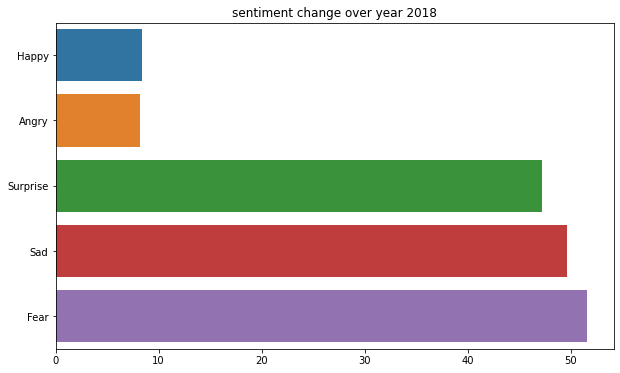

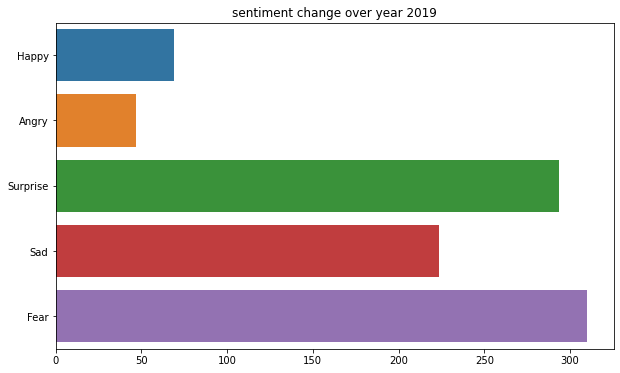

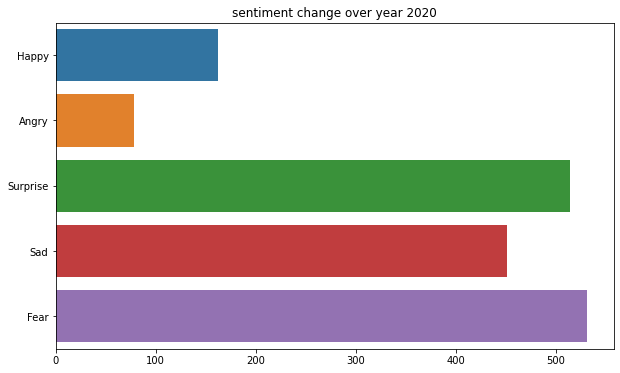

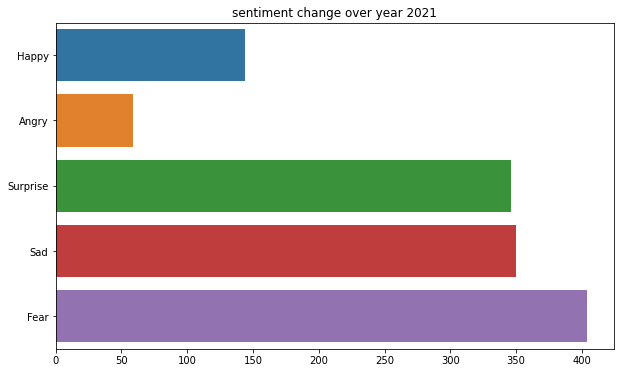

In [ ]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# print("Setup Complete")

sentiments = ['Happy','Angry', 'Surprise','Sad', 'Fear']
# print(count2)

for i in range(4):
  plt.figure(figsize=(10,6))
  plt.title("sentiment change over year " + str(2018 + i))
  sns.barplot(x=count2[i], y=sentiments)
  plt.savefig("year " + str(2018 + i) + "sentiments")
# plt.ylabel("Arrival delay (in minutes)")

## Plotting sentiment over years for comments

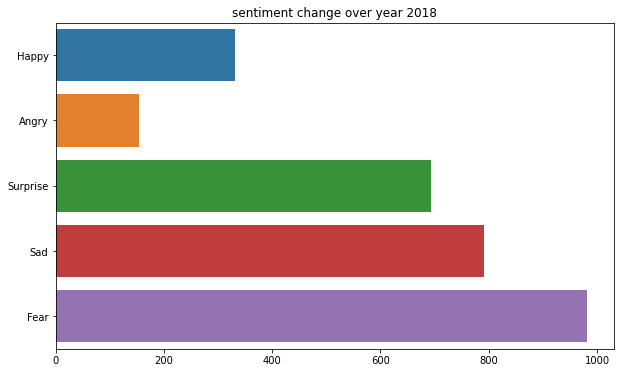

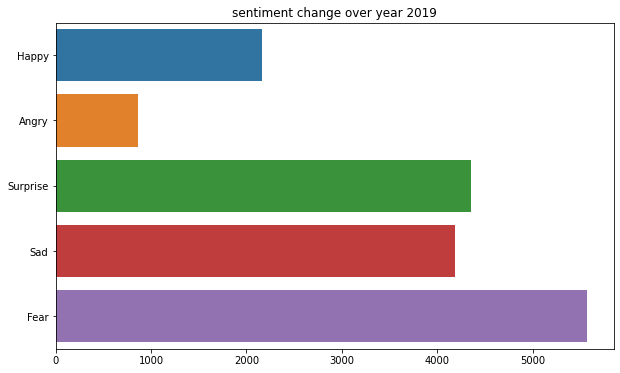

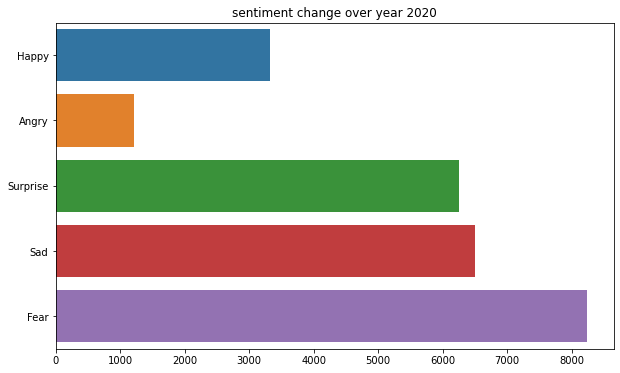

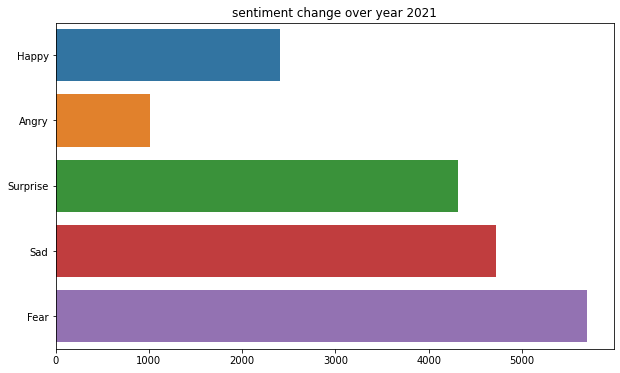

In [ ]:
for i in range(4):
  plt.figure(figsize=(10,6))
  plt.title("sentiment change over year " + str(2018 + i))
  sns.barplot(x=count[i], y=sentiments)
  plt.savefig("year " + str(2018 + i) + "sentiments_comments")

## Additional analysis

In [ ]:
counts2 = [[], [], [], []]
counts = [[], [], [], []]
for i in range(3):
  for j in range(5):
    counts2[i].append(count2[i][j]/12) 
    counts[i].append(count[i][j]/12)

for j in range(5):
  counts2[3].append(count2[3][j]/8) 
  counts[3].append(count[3][j]/8)
print("Average sentiment per year")
print("[Happy, Angry, Surprise, Sad, Fear]")
print()
print("posts: ")

for i in range(4):
  print(str(2018+i) + ": " + str(counts2[i]) )
print()
print("comments: ")
for i in range(4):
  print(str(2018+i) + ": " + str(counts[i]) )

In [ ]:
counts2 = [[], [], [], []]
counts = [[], [], [], []]

for j in range(5):
  counts2[0].append(count2[0][j]*100/269) 
  counts[0].append(count[0][j]*100/3828)

for j in range(5):
  counts2[1].append(count2[1][j]*100/1472) 
  counts[1].append(count[1][j]*100/22773)

for j in range(5):
  counts2[2].append(count2[2][j]*100/2886) 
  counts[2].append(count[2][j]*100/34071)

for j in range(5):
  counts2[3].append(count2[3][j]*100/2280) 
  counts[3].append(count[3][j]*100/25651)
print("Average sentiment per post/comment")
print("[Happy, Angry, Surprise, Sad, Fear]")
print()
print("posts: ")
for i in range(4):
  print(str(2018+i) + ": " + str(counts2[i]) )
print()
print("comments: ")
for i in range(4):
  print(str(2018+i) + ": " + str(counts[i]) )

# Final graph links

- Posts: https://jsfiddle.net/wjLmv75n/
- Comments: https://jsfiddle.net/13ogkfzy/1/